In [1]:
import warnings

import moscot as mt
from moscot import datasets
from moscot.problems.space import AlignmentProblem

import scanpy as sc
import squidpy as sq

warnings.simplefilter("ignore", UserWarning)

import pandas as pd

In [2]:
datasets = ["bc1160920F","bc1142243F"]
input_dir = 'G:/dataset/3_BRCA/input/'
output_dir = 'G:/dataset/3_BRCA/output/moscot/'
experiment_name = 'BRCA'

In [3]:
import anndata as ad
adata_list = []

for dataset in datasets:
    # adata = sc.read_visium(input_dir + dataset)
    # adata.var_names_make_unique()
    # adata.obs_names_make_unique()

    adata = sc.read_h5ad(input_dir + dataset+'.h5ad')
    df = adata.obs[['x','y']].astype('float32')
    adata.obsm['spatial'] = df.values
    
    adata.obs['ground.truth'] = adata.obs.loc[adata.obs_names, 'Classification'].astype('category')
    adata = adata[~pd.isna(adata.obs['x'])]
    
    # make spot name unique
    adata.obs_names = [x + '_' + dataset for x in adata.obs_names]

    adata_list.append(adata)

print(adata_list)
adata = ad.concat(adata_list, label="slice_name", keys=datasets)
# adata =sc.AnnData.concatenate(adata_list[0],adata_list[1],adata_list[2],adata_list[3])
print(adata)
del adata_list

D:\anaconda\envs\moscot\lib\site-packages\anndata\_core\anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
D:\anaconda\envs\moscot\lib\site-packages\anndata\_core\anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
D:\anaconda\envs\moscot\lib\site-packages\anndata\_core\merge.py:217: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(dtype):


[AnnData object with n_obs × n_vars = 4895 × 28402
    obs: 'orig.ident', 'nCount_Spatial', 'nFeature_Spatial', 'Classification', 'batch', 'x', 'y', 'imagerow', 'imagecol', 'ground.truth'
    var: 'features'
    obsm: 'spatial', AnnData object with n_obs × n_vars = 4784 × 28402
    obs: 'orig.ident', 'nCount_Spatial', 'nFeature_Spatial', 'Classification', 'batch', 'x', 'y', 'imagerow', 'imagecol', 'ground.truth'
    var: 'features'
    obsm: 'spatial']
AnnData object with n_obs × n_vars = 9679 × 28402
    obs: 'orig.ident', 'nCount_Spatial', 'nFeature_Spatial', 'Classification', 'batch', 'x', 'y', 'imagerow', 'imagecol', 'ground.truth', 'slice_name'
    obsm: 'spatial'


In [4]:
# adata = datasets.sim_align()
adata.obs['slice_name']

TGTTGGCTGGCGGAAG-1_bc1160920F    bc1160920F
GCATCCTCTCCTATTA-1_bc1160920F    bc1160920F
GCGAGGGACTGCTAGA-1_bc1160920F    bc1160920F
TGGTACCGGCACAGCC-1_bc1160920F    bc1160920F
GCGCGTTTAAATCGTA-1_bc1160920F    bc1160920F
                                    ...    
GAACGTTTGTATCCAC-1_bc1142243F    bc1142243F
ATTGAATTCCCTGTAG-1_bc1142243F    bc1142243F
TACCTCACCAATTGTA-1_bc1142243F    bc1142243F
AGTCGAATTAGCGTAA-1_bc1142243F    bc1142243F
TTGAAGTGCATCTACA-1_bc1142243F    bc1142243F
Name: slice_name, Length: 9679, dtype: category
Categories (2, object): ['bc1160920F', 'bc1142243F']

D:\anaconda\envs\moscot\lib\site-packages\squidpy\pl\_spatial_utils.py:747: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if c is not None and c in adata.obs and is_categorical_dtype(adata.obs[c]):
D:\anaconda\envs\moscot\lib\site-packages\squidpy\pl\_spatial_utils.py:471: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(color_source_vector):
D:\anaconda\envs\moscot\lib\site-packages\squidpy\pl\_spatial_utils.py:483: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = color_source_vector.map(color_map)
D:\anaconda\envs\moscot\lib\site-packages\squidpy\pl\_spatial_utils.py:649:

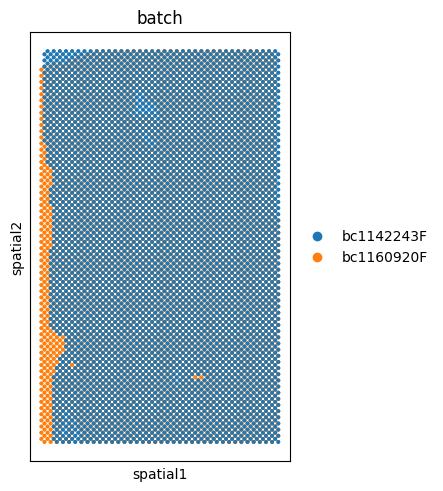

In [5]:
sq.pl.spatial_scatter(adata, shape=None, library_id="batch", color="batch")

In [6]:
%%time

ap = AlignmentProblem(adata=adata)
ap = ap.prepare(batch_key="batch", policy="sequential")

ap = ap.solve()

INFO     Ordering Index(['TGTTGGCTGGCGGAAG-1_bc1160920F', 'GCATCCTCTCCTATTA-1_bc1160920F',                         
                'GCGAGGGACTGCTAGA-1_bc1160920F', 'TGGTACCGGCACAGCC-1_bc1160920F',                                  
                'GCGCGTTTAAATCGTA-1_bc1160920F', 'TGCCTTGCCCTTACGG-1_bc1160920F',                                  
                'GACGACTTTCCAAGAA-1_bc1160920F', 'CCAGTGAGCTCCTTGT-1_bc1160920F',                                  
                'ATACCCTGGCTCAAAT-1_bc1160920F', 'GGGTTTCCGGCTTCCA-1_bc1160920F',                                  
                ...                                                                                                
                'CTGCAGGGTGACGCTC-1_bc1142243F', 'TCATGGAGGCCTTTGT-1_bc1142243F',                                  
                'ATGGCCCGAAAGGTTA-1_bc1142243F', 'CGTAATATGGCCCTTG-1_bc1142243F',                                  
                'AGAGTCTTAATGAAAG-1_bc1142243F', 'GAACGTTTGTATCCAC-1_bc1

D:\anaconda\envs\moscot\lib\site-packages\anndata\_core\anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
D:\anaconda\envs\moscot\lib\site-packages\anndata\_core\anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


INFO     Computing pca with `n_comps=30` for `xy` using `adata.X`                                                  
INFO     Normalizing spatial coordinates of `x`.                                                                   
INFO     Normalizing spatial coordinates of `y`.                                                                   


D:\anaconda\envs\moscot\lib\site-packages\anndata\_core\anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
D:\anaconda\envs\moscot\lib\site-packages\anndata\_core\anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
D:\anaconda\envs\moscot\lib\site-packages\anndata\_core\anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
D:\anaconda\envs\moscot\lib\site-packages\anndata\_core\anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical

INFO     Solving `1` problems                                                                                      
INFO     Solving problem OTProblem[stage='prepared', shape=(4784, 4895)].                                          


D:\anaconda\envs\moscot\lib\site-packages\anndata\_core\anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
D:\anaconda\envs\moscot\lib\site-packages\anndata\_core\anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


CPU times: total: 19min 57s
Wall time: 5min 55s


D:\anaconda\envs\moscot\lib\site-packages\anndata\_core\anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
D:\anaconda\envs\moscot\lib\site-packages\anndata\_core\anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


AnnData object with n_obs × n_vars = 9679 × 28402
    obs: 'orig.ident', 'nCount_Spatial', 'nFeature_Spatial', 'Classification', 'batch', 'x', 'y', 'imagerow', 'imagecol', 'ground.truth', 'slice_name'
    uns: 'batch_colors'
    obsm: 'spatial', 'spatial_warp_sequential'


D:\anaconda\envs\moscot\lib\site-packages\squidpy\pl\_spatial_utils.py:747: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if c is not None and c in adata.obs and is_categorical_dtype(adata.obs[c]):
D:\anaconda\envs\moscot\lib\site-packages\squidpy\pl\_spatial_utils.py:471: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(color_source_vector):
D:\anaconda\envs\moscot\lib\site-packages\squidpy\pl\_spatial_utils.py:483: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = color_source_vector.map(color_map)
D:\anaconda\envs\moscot\lib\site-packages\squidpy\pl\_spatial_utils.py:649:

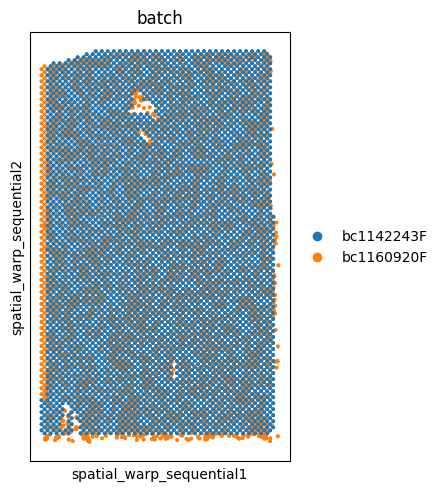

In [8]:
ap.align(reference="bc1160920F", mode="warp", spatial_key="spatial", key_added="spatial_warp_sequential")
print(adata)

sq.pl.spatial_scatter(
    adata, shape=None, spatial_key="spatial_warp_sequential", library_id="batch", color="batch"
)

D:\anaconda\envs\moscot\lib\site-packages\anndata\_core\anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
D:\anaconda\envs\moscot\lib\site-packages\anndata\_core\anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
D:\anaconda\envs\moscot\lib\site-packages\squidpy\pl\_spatial_utils.py:747: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if c is not None and c in adata.obs and is_categorical_dtype(adata.obs[c]):
D:\anaconda\envs\moscot\lib\site-packages\squidpy\pl\_spatial_utils.py:471: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Categori

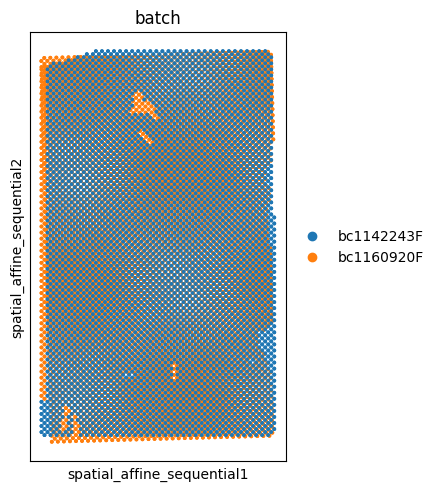

In [9]:
ap.align(reference="bc1160920F", mode="affine", spatial_key="spatial", key_added="spatial_affine_sequential")

sq.pl.spatial_scatter(
    adata, shape=None, spatial_key="spatial_affine_sequential", library_id="batch", color="batch"
)

In [ ]:
# %%time

# ap_star = AlignmentProblem(adata=adata)
# ap_star = ap_star.prepare(batch_key="batch", policy="star", reference="0")

# ap_star = ap_star.solve()

In [ ]:
# ap_star.align(reference="0", mode="warp", spatial_key="spatial", key_added="spatial_warp_star")
# print(adata)

# sq.pl.spatial_scatter(
#     adata, shape=None, spatial_key="spatial_warp_star", library_id="batch", color="batch"
# )

In [ ]:
# ap_star.align(reference="0", mode="affine", spatial_key="spatial", key_added="spatial_affine_star")

# sq.pl.spatial_scatter(
#     adata, shape=None, spatial_key="spatial_affine_star", library_id="batch", color="batch"
# )

In [ ]:
adata

In [10]:
adata

AnnData object with n_obs × n_vars = 9679 × 28402
    obs: 'orig.ident', 'nCount_Spatial', 'nFeature_Spatial', 'Classification', 'batch', 'x', 'y', 'imagerow', 'imagecol', 'ground.truth', 'slice_name'
    uns: 'batch_colors', 'spatial_affine_sequential'
    obsm: 'spatial', 'spatial_warp_sequential', 'spatial_affine_sequential'

In [11]:
print(adata.isbacked)
adata.obs = adata.obs.astype('str')
adata.filename = output_dir + 'moscot_' + experiment_name + '.h5ad'
print(adata.isbacked)

False
True
